In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sea

sea.set()

In [2]:
training_dataset = pd.read_excel(r"C:\Users\manoj\Downloads\Data_Train.xlsx")
testing_dataset=pd.read_excel(r"C:\Users\manoj\Downloads\Test_set.xlsx")

In [3]:
print("\nEDA on Training Set\n")
print("-"*30)

print("\nFeatures/Columns : \n", training_dataset.columns)
print("\n\nNumber of Features/Columns : ", len(training_dataset.columns))
print("\nNumber of Rows : ",len(training_dataset))
print("\n\nData Types :\n", training_dataset.dtypes)

print("\n Contains NaN/Empty cells : ", training_dataset.isnull().values.any())

print("\n Total empty cells by column :\n", training_dataset.isnull().sum(), "\n\n")


EDA on Training Set

------------------------------

Features/Columns : 
 Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')


Number of Features/Columns :  11

Number of Rows :  10683


Data Types :
 Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

 Contains NaN/Empty cells :  True

 Total empty cells by column :
 Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64 




In [4]:
print("EDA on Test Set\n")
print("-"*30)
print("\nFeatures/Columns : \n",testing_dataset.columns)
print("\n\nNumber of Features/Columns : ",len(testing_dataset.columns))
print("\nNumber of Rows : ",len(testing_dataset))
print("\n\nData Types :\n", testing_dataset.dtypes)
print("\n Contains NaN/Empty cells : ",testing_dataset.isnull().values.any())
print("\n Total empty cells by column :\n",testing_dataset.isnull().sum())

EDA on Test Set

------------------------------

Features/Columns : 
 Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')


Number of Features/Columns :  10

Number of Rows :  2671


Data Types :
 Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

 Contains NaN/Empty cells :  False

 Total empty cells by column :
 Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64


In [5]:
pd.set_option('display.max_columns', None)

In [6]:
training_dataset.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
training_dataset["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [9]:
print("Original Length of Training Set : ", len(training_dataset))

Original Length of Training Set :  10683


In [10]:
training_dataset=training_dataset.dropna()


In [11]:
print("Length of Training Set after dropping NaN: ", len(training_dataset))

Length of Training Set after dropping NaN:  10682


In [12]:
training_dataset['Journey_Day'] = pd.to_datetime(training_dataset.Date_of_Journey, format='%d/%m/%Y').dt.day

training_dataset['Journey_Month'] = pd.to_datetime(training_dataset.Date_of_Journey, format='%d/%m/%Y').dt.month

testing_dataset['Journey_Day'] = pd.to_datetime(testing_dataset.Date_of_Journey, format='%d/%m/%Y').dt.day

testing_dataset['Journey_Month'] = pd.to_datetime(testing_dataset.Date_of_Journey, format='%d/%m/%Y').dt.month

training_dataset.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)

testing_dataset.drop(labels = 'Date_of_Journey', axis = 1, inplace = True)

In [13]:
duration = list(training_dataset['Duration'])

for i in range(len(duration)) :
    if len(duration[i].split()) != 2:
        if 'h' in duration[i] :
            duration[i] = duration[i].strip() + ' 0m'
        elif 'm' in duration[i] :
            duration[i] = '0h {}'.format(duration[i].strip())

dur_hours = []
dur_minutes = []  

for i in range(len(duration)) :
    dur_hours.append(int(duration[i].split()[0][:-1]))
    dur_minutes.append(int(duration[i].split()[1][:-1]))
    
training_dataset['Duration_hours'] = dur_hours
training_dataset['Duration_minutes'] =dur_minutes

training_dataset.drop(labels = 'Duration', axis = 1, inplace = True)

durationT = list(testing_dataset['Duration'])

for i in range(len(durationT)) :
    if len(durationT[i].split()) != 2:
        if 'h' in durationT[i] :
            durationT[i] = durationT[i].strip() + ' 0m'
        elif 'm' in durationT[i] :
            durationT[i] = '0h {}'.format(durationT[i].strip())
            
dur_hours = []
dur_minutes = []  

for i in range(len(durationT)) :
    dur_hours.append(int(durationT[i].split()[0][:-1]))
    dur_minutes.append(int(durationT[i].split()[1][:-1]))
  
    
testing_dataset['Duration_hours'] = dur_hours
testing_dataset['Duration_minutes'] = dur_minutes

testing_dataset.drop(labels = 'Duration', axis = 1, inplace = True)

In [14]:
training_dataset['Depart_Time_Hour'] = pd.to_datetime(training_dataset.Dep_Time).dt.hour
training_dataset['Depart_Time_Minutes'] = pd.to_datetime(training_dataset.Dep_Time).dt.minute

training_dataset.drop(labels = 'Dep_Time', axis = 1, inplace = True)


training_dataset['Arr_Time_Hour'] = pd.to_datetime(training_dataset.Arrival_Time).dt.hour
training_dataset['Arr_Time_Minutes'] = pd.to_datetime(training_dataset.Arrival_Time).dt.minute

training_dataset.drop(labels = 'Arrival_Time', axis = 1, inplace = True)

testing_dataset['Depart_Time_Hour'] = pd.to_datetime(testing_dataset.Dep_Time).dt.hour
testing_dataset['Depart_Time_Minutes'] = pd.to_datetime(testing_dataset.Dep_Time).dt.minute


testing_dataset.drop(labels = 'Dep_Time', axis = 1, inplace = True)

testing_dataset['Arr_Time_Hour'] = pd.to_datetime(testing_dataset.Arrival_Time).dt.hour
testing_dataset['Arr_Time_Minutes'] = pd.to_datetime(testing_dataset.Arrival_Time).dt.minute

testing_dataset.drop(labels = 'Arrival_Time', axis = 1, inplace = True)

In [15]:
training_dataset.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_Day,Journey_Month,Duration_hours,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2,50,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,7,25,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,19,0,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,5,25,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,4,45,16,50,21,35


In [16]:
testing_dataset.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey_Day,Journey_Month,Duration_hours,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,10,55,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,4,0,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,23,45,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,13,0,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,2,50,23,55,2,45


In [17]:
training_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              10682 non-null  object
 1   Source               10682 non-null  object
 2   Destination          10682 non-null  object
 3   Route                10682 non-null  object
 4   Total_Stops          10682 non-null  object
 5   Additional_Info      10682 non-null  object
 6   Price                10682 non-null  int64 
 7   Journey_Day          10682 non-null  int64 
 8   Journey_Month        10682 non-null  int64 
 9   Duration_hours       10682 non-null  int64 
 10  Duration_minutes     10682 non-null  int64 
 11  Depart_Time_Hour     10682 non-null  int64 
 12  Depart_Time_Minutes  10682 non-null  int64 
 13  Arr_Time_Hour        10682 non-null  int64 
 14  Arr_Time_Minutes     10682 non-null  int64 
dtypes: int64(9), object(6)
memory usage: 1.3+ MB


In [18]:
testing_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Airline              2671 non-null   object
 1   Source               2671 non-null   object
 2   Destination          2671 non-null   object
 3   Route                2671 non-null   object
 4   Total_Stops          2671 non-null   object
 5   Additional_Info      2671 non-null   object
 6   Journey_Day          2671 non-null   int64 
 7   Journey_Month        2671 non-null   int64 
 8   Duration_hours       2671 non-null   int64 
 9   Duration_minutes     2671 non-null   int64 
 10  Depart_Time_Hour     2671 non-null   int64 
 11  Depart_Time_Minutes  2671 non-null   int64 
 12  Arr_Time_Hour        2671 non-null   int64 
 13  Arr_Time_Minutes     2671 non-null   int64 
dtypes: int64(8), object(6)
memory usage: 292.3+ KB


In [19]:
training_dataset["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

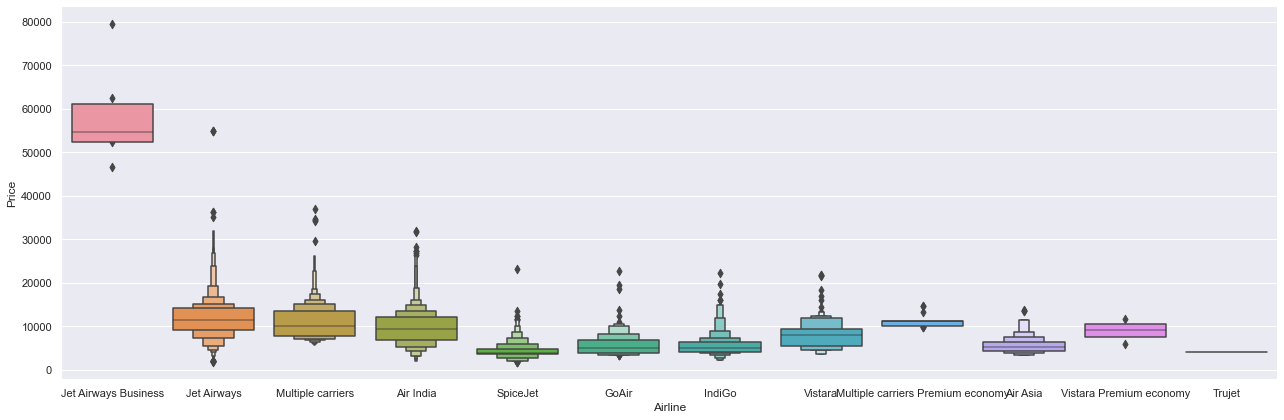

In [20]:
sea.catplot(y = "Price", x = "Airline", data =training_dataset.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plot.show()

In [21]:
Airline = training_dataset[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [22]:
training_dataset["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

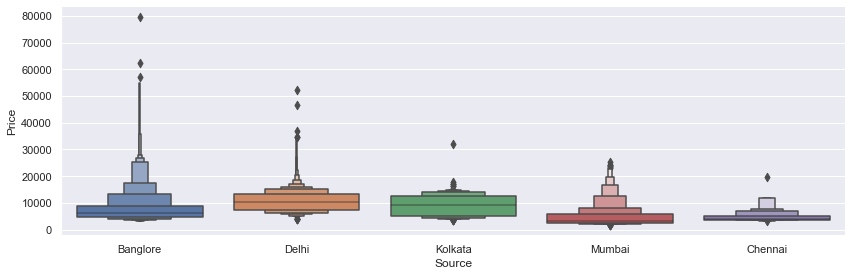

In [23]:
sea.catplot(y = "Price", x = "Source", data =training_dataset.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plot.show()

In [24]:
Source = training_dataset[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [25]:
training_dataset["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

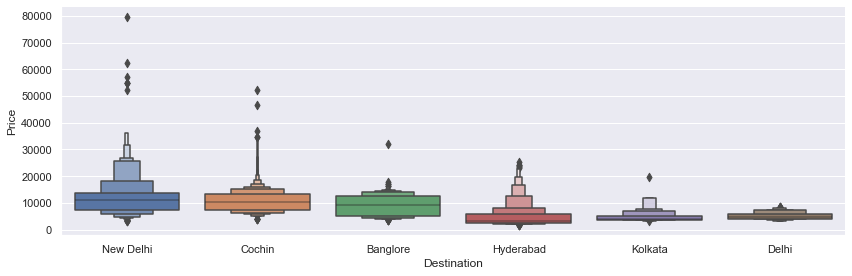

In [26]:
sea.catplot(y = "Price", x = "Destination", data =training_dataset.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plot.show()

In [27]:
Destination = training_dataset[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [28]:
training_dataset["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [29]:
training_dataset.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [30]:
training_dataset["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [31]:
training_dataset.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [32]:
training_dataset.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Duration_hours,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2,50,22,20,1,10
1,Air India,Kolkata,Banglore,2,7662,1,5,7,25,5,50,13,15
2,Jet Airways,Delhi,Cochin,2,13882,9,6,19,0,9,25,4,25
3,IndiGo,Kolkata,Banglore,1,6218,12,5,5,25,18,5,23,30
4,IndiGo,Banglore,New Delhi,1,13302,1,3,4,45,16,50,21,35


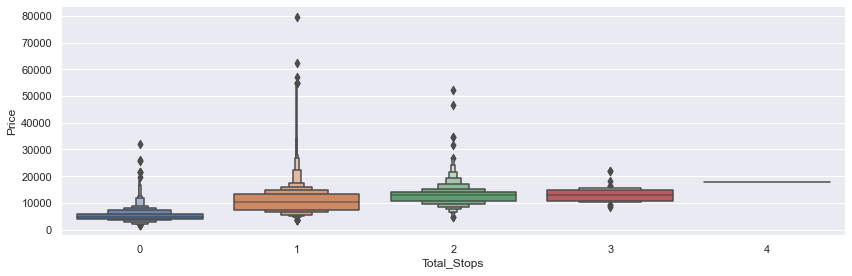

In [33]:
sea.catplot(y = "Price", x = "Total_Stops", data =training_dataset.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plot.show()

In [34]:
data_train = pd.concat([training_dataset, Airline, Source, Destination], axis = 1)

In [35]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_Day,Journey_Month,Duration_hours,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,2,50,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,7,25,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,19,0,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,5,25,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,4,45,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [36]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [37]:
data_train.head()

,Total_Stops,Price,Journey_Day,Journey_Month,Duration_hours,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,2,50,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,7,25,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,19,0,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,5,25,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,4,45,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [38]:
data_train.shape

(10682, 30)

In [39]:
testing_dataset["Airline"].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [40]:
Airline = pd.get_dummies(testing_dataset["Airline"], drop_first= True)

In [41]:
testing_dataset["Source"].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [42]:
Source = pd.get_dummies(testing_dataset["Source"], drop_first= True)


In [43]:
testing_dataset["Destination"].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [44]:
Destination = pd.get_dummies(testing_dataset["Destination"], drop_first = True)

In [45]:
testing_dataset.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [46]:
testing_dataset.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


In [47]:
data_test = pd.concat([testing_dataset, Airline, Source, Destination], axis = 1)

In [48]:
data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [49]:
data_test.shape

(2671, 28)

In [50]:
data_test.head()

,Total_Stops,Journey_Day,Journey_Month,Duration_hours,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,10,55,17,30,4,25,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,4,0,6,20,10,20,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,23,45,19,15,19,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,13,0,8,0,21,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,2,50,23,55,2,45,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [51]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_Day', 'Journey_Month',
       'Duration_hours', 'Duration_minutes', 'Depart_Time_Hour',
       'Depart_Time_Minutes', 'Arr_Time_Hour', 'Arr_Time_Minutes',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [52]:
X = data_train.loc[:, ['Total_Stops', 'Journey_Day', 'Journey_Month',
       'Duration_hours', 'Duration_minutes', 'Depart_Time_Hour',
       'Depart_Time_Minutes', 'Arr_Time_Hour', 'Arr_Time_Minutes',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

In [53]:
X.head()

,Total_Stops,Journey_Day,Journey_Month,Duration_hours,Duration_minutes,Depart_Time_Hour,Depart_Time_Minutes,Arr_Time_Hour,Arr_Time_Minutes,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,2,50,22,20,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,7,25,5,50,13,15,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,19,0,9,25,4,25,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,5,25,18,5,23,30,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,4,45,16,50,21,35,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [54]:
y= data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

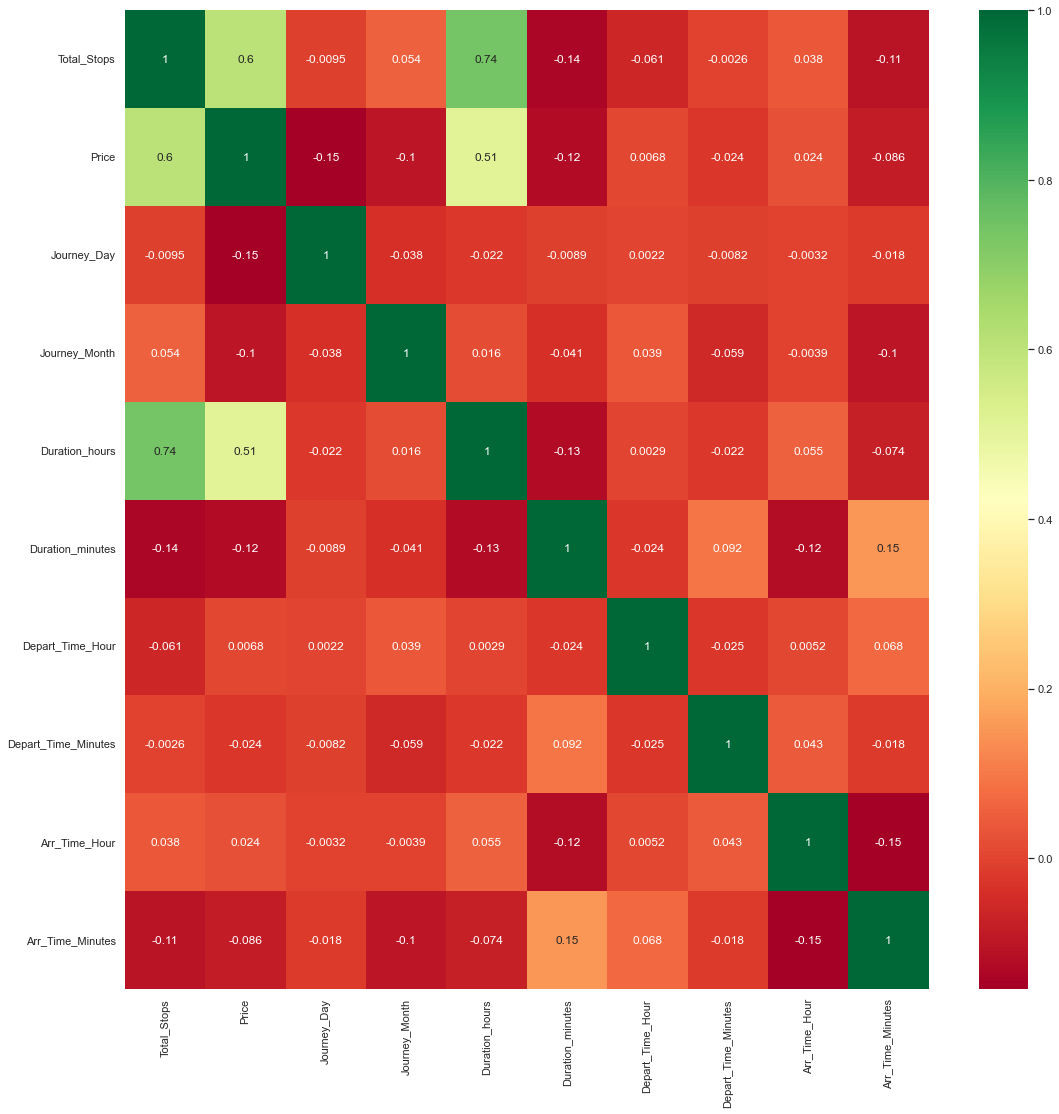

In [55]:
plot.figure(figsize = (18,18))
sea.heatmap(training_dataset.corr(), annot = True, cmap = "RdYlGn")
plot.show()

In [56]:
Threshold=0.9
def correlation(dataset, threshold):
    col_corr = set()  
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > Threshold:
                colname = corr_matrix.columns[i] 
                col_corr.add(colname)
    return col_corr

correlation(X,Threshold)


{'Destination_Cochin', 'Destination_Hyderabad', 'Destination_Kolkata'}

In [57]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [58]:
print(selection.feature_importances_)

[2.37636220e-01 1.42601659e-01 5.41399646e-02 1.20175309e-01
 1.73306042e-02 2.40562662e-02 2.16066319e-02 2.79355483e-02
 1.86185279e-02 1.12529160e-02 1.81718071e-03 1.67265214e-02
 1.35793404e-01 6.74593608e-02 1.90234550e-02 8.40631120e-04
 2.83601234e-03 1.05466807e-04 5.41228819e-03 7.66948833e-05
 5.05797121e-04 1.00152718e-02 3.21731871e-03 5.80879637e-03
 8.95020804e-03 1.38921993e-02 6.91103654e-03 5.83307326e-04
 2.46714020e-02]


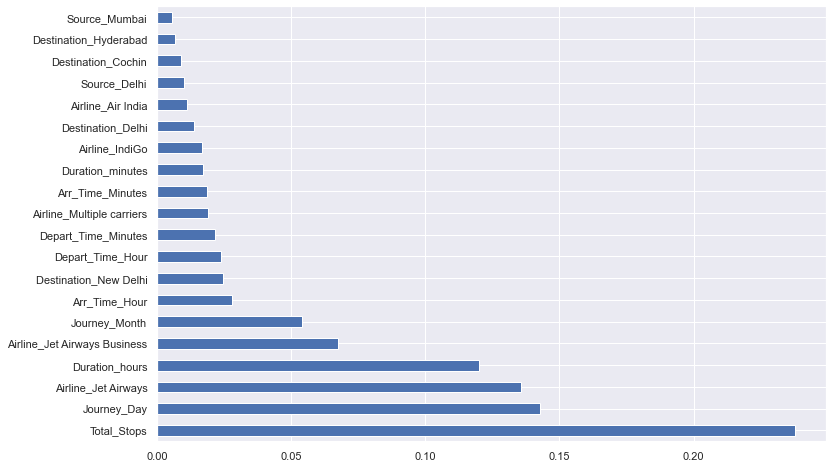

In [59]:
plot.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plot.show()

In [60]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
fs=SelectKBest(score_func=f_regression)  
X_selected=fs.fit(X,y)

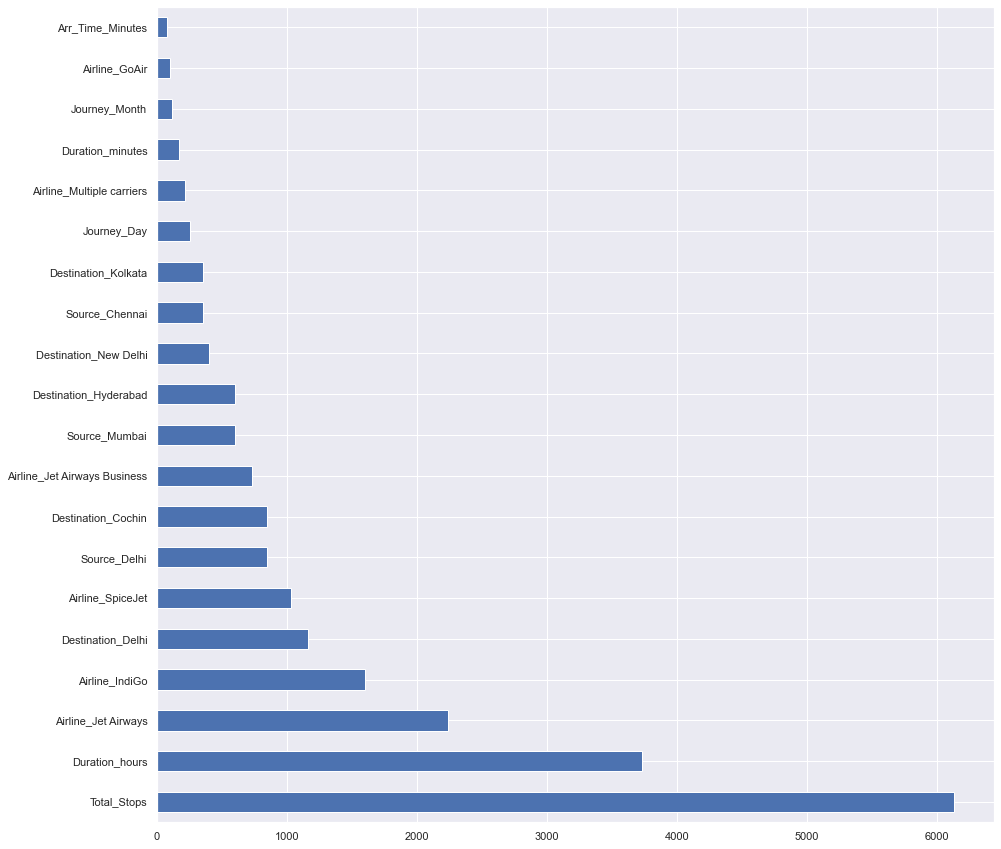

In [61]:
plot.figure(figsize=(15,15))
feat_importances = pd.Series(X_selected.scores_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plot.show()

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [63]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [64]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Total_Stops,2756.979348
Journey_Day,-72.489580
Journey_Month,-425.346169
Duration_hours,2.589734
Duration_minutes,-1.902034
Depart_Time_Hour,20.252376
Depart_Time_Minutes,-2.169579
Arr_Time_Hour,-11.697206
Arr_Time_Minutes,2.208365
Airline_Air India,1658.629055


In [65]:
y_pred = regressor.predict(X_test)

In [66]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
6075,16655,13341.370632
3544,4959,7639.703332
9291,9187,9606.385254
5032,3858,3675.309129
2483,12898,11212.427980
...,...,...
9797,7408,9348.313874
9871,4622,5516.500848
10063,7452,6777.874211
8802,8824,11226.036531


In [67]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1972.9372855148056
Mean Squared Error: 8202327.55740714
Root Mean Squared Error: 2863.970592971782


In [68]:
print(regressor.score(X_test,y_test))
print(regressor.score(X_train,y_train))

0.6195943729070097
0.6240840020468166


C:\Users\manoj\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


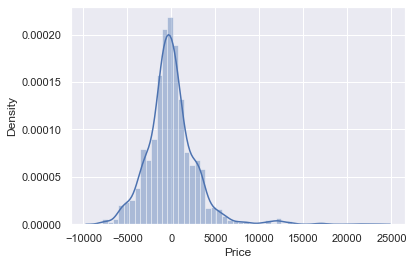

In [69]:
sea.distplot(y_test-y_pred)
plot.show()

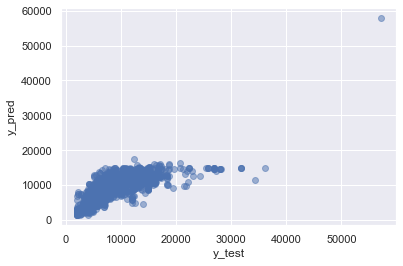

In [70]:
plot.scatter(y_test, y_pred, alpha = 0.5)
plot.xlabel("y_test")
plot.ylabel("y_pred")
plot.show()

In [71]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [72]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor.fit(X1_train, y1_train)

DecisionTreeRegressor()

In [73]:
y1_pred = regressor.predict(X1_test)

In [74]:
df1=pd.DataFrame({'Actual':y1_test, 'Predicted':y1_pred})
df1

,Actual,Predicted
6075,16655,16840.0
3544,4959,4959.0
9291,9187,9187.0
5032,3858,3597.0
2483,12898,16079.0
...,...,...
9797,7408,13587.0
9871,4622,4096.0
10063,7452,6152.0
8802,8824,13339.0


In [75]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y1_test, y1_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y1_test, y1_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y1_test, y1_pred)))

Mean Absolute Error: 1321.953478396506
Mean Squared Error: 5812305.6001883475
Root Mean Squared Error: 2410.8723732683047


In [76]:
print(regressor.score(X1_test,y1_test))
print(regressor.score(X1_train,y1_train))

0.7304382516766151
0.9692484150527355


C:\Users\manoj\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


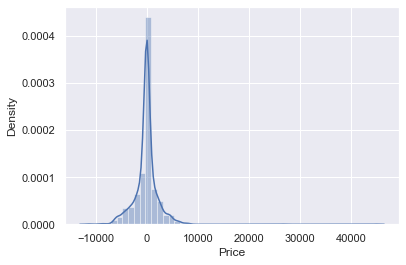

In [77]:
sea.distplot(y1_test-y1_pred)
plot.show()

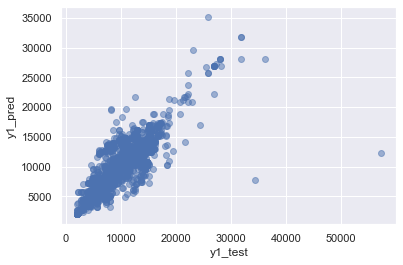

In [78]:
plot.scatter(y1_test, y1_pred, alpha = 0.5)
plot.xlabel("y1_test")
plot.ylabel("y1_pred")
plot.show()

In [79]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size = 0.20)

In [80]:
from sklearn.neighbors import KNeighborsRegressor

In [81]:
knn_model = KNeighborsRegressor(n_neighbors=3)

In [82]:
knn_model.fit(X2_train, y2_train)

KNeighborsRegressor(n_neighbors=3)

In [83]:
from sklearn.metrics import mean_squared_error
from math import sqrt
y2_pred = knn_model.predict(X2_test)
mse = mean_squared_error(y2_test,y2_pred)

In [84]:
print(mse)

7605447.909634482


In [85]:
rmse = sqrt(mse)

In [86]:
print(rmse)

2757.7976556728163


In [87]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y2_test, y2_pred)

In [88]:
print(mae)

1822.4935267508968


In [89]:
print(knn_model.score(X2_test,y2_test))
print(knn_model.score(X2_train,y2_train))

0.610439798756335
0.8053589442620703


C:\Users\manoj\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


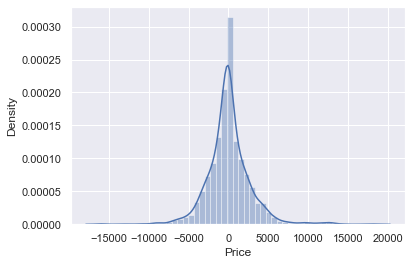

In [90]:
sea.distplot(y2_test-y2_pred)
plot.show()

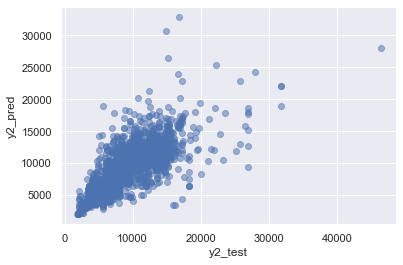

In [91]:
plot.scatter(y2_test, y2_pred, alpha = 0.5)
plot.xlabel("y2_test")
plot.ylabel("y2_pred")
plot.show()

In [92]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [93]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X3_train, y3_train)

RandomForestRegressor()

In [94]:
y3_pred = reg_rf.predict(X3_test)

In [95]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y3_test, y3_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y3_test, y3_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y3_test, y3_pred)))

Mean Absolute Error: 1168.0890661694673
Mean Squared Error: 4330175.206803953
Root Mean Squared Error: 2080.907303750927


In [96]:
print(reg_rf.score(X3_test,y3_test))
print(reg_rf.score(X3_train,y3_train))

0.7991761480582122
0.9536236798933931


C:\Users\manoj\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


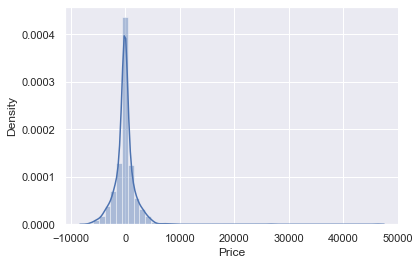

In [97]:
sea.distplot(y3_test-y3_pred)
plot.show()

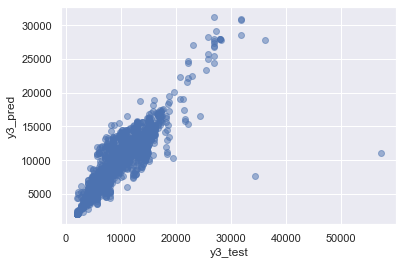

In [98]:
plot.scatter(y3_test, y3_pred, alpha = 0.5)
plot.xlabel("y3_test")
plot.ylabel("y3_pred")
plot.show()

In [99]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X, y, test_size = 0.2, random_state =42)

In [100]:
from xgboost import XGBRegressor
xgr=XGBRegressor()
xgr.fit(X4_train,y4_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [101]:
y4_pred=xgr.predict(X4_test)

In [102]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y4_test, y4_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y4_test, y4_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y4_test, y4_pred)))

Mean Absolute Error: 1131.830122623256
Mean Squared Error: 3087950.0238120654
Root Mean Squared Error: 1757.256391028943


In [103]:
print('Test Score     :',xgr.score(X4_test, y4_test))
print('Training Score :',xgr.score(X4_train, y4_train))

Test Score     : 0.8567877767598723
Training Score : 0.9353790824683148


C:\Users\manoj\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


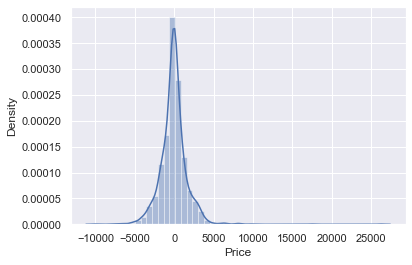

In [104]:
sea.distplot(y4_test-y4_pred)
plot.show()

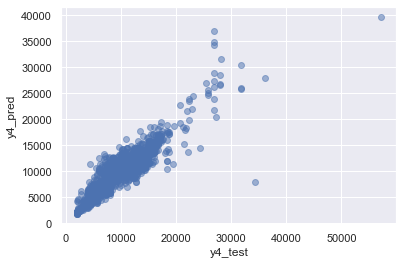

In [105]:
plot.scatter(y4_test, y4_pred, alpha = 0.5)
plot.xlabel("y4_test")
plot.ylabel("y4_pred")
plot.show()

In [106]:
params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}

In [107]:
xgbr =XGBRegressor(seed = 20)

In [108]:
from sklearn.model_selection import RandomizedSearchCV
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=5,
                         verbose=1,n_jobs=4)

In [ ]:
clf.fit(X4_train, y4_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [110]:
print("Best parameters:", clf.best_params_)

Best parameters: {'subsample': 0.6, 'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.4, 'colsample_bylevel': 0.7999999999999999}


In [111]:
prediction = clf.predict(X4_test)

In [112]:
print('MAE:', metrics.mean_absolute_error(y4_test, prediction))
print('MSE:', metrics.mean_squared_error(y4_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, prediction)))

MAE: 1200.7468803809188
MSE: 3297906.902026015
RMSE: 1816.014014820925


In [113]:
import pickle

In [114]:
file = open('flight_fare.pkl', 'wb')

In [122]:
pickle.dump(xgr,file)

In [123]:
model = open('flight_fare.pkl','rb')

In [124]:
mod= pickle.load(model)

In [125]:
mod.fit(X,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [126]:
y_prediction = mod.predict(X4_test)

In [127]:
metrics.r2_score(y4_test, y_prediction)

0.928035247214292

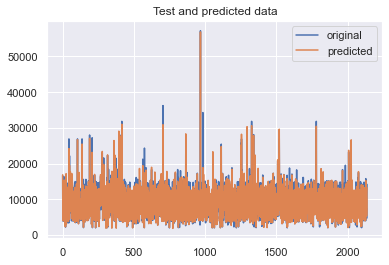

In [128]:
x_ax = range(len(y4_test))
plot.plot(x_ax, y4_test, label="original")
plot.plot(x_ax, y_prediction, label="predicted")
plot.title("Test and predicted data")
plot.legend()
plot.show()